In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oli = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/arnab/scikit_learn_data


In [3]:
oli


{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [5]:
oli.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [6]:
oli['data'].shape

(400, 4096)

In [7]:
oli['images'].shape

(400, 64, 64)

In [8]:
oli['target'].shape

(400,)

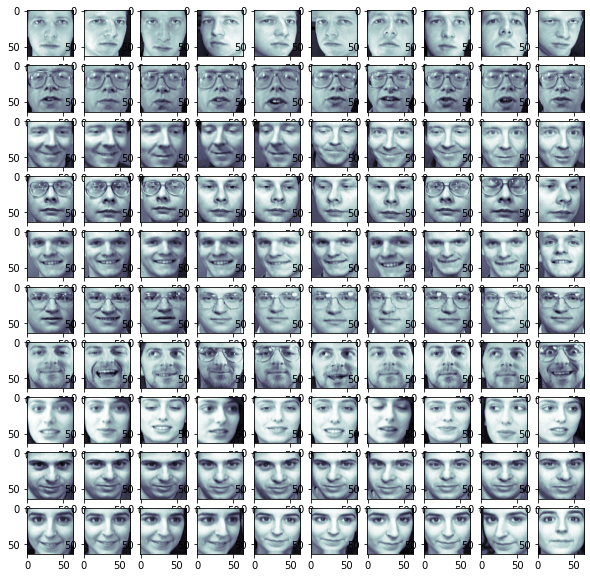

In [12]:
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.imshow(oli.images[i], cmap = plt.cm.bone)
plt.show()

In [13]:
x = oli.data
y = oli.target


In [14]:
pca = PCA()
pca.fit(x)

PCA()

In [15]:
pca.components_.shape

(400, 4096)

In [17]:
total = sum(pca.explained_variance_)
k=0
current_variance = 0
while current_variance/total < 0.95:
    current_variance+=pca.explained_variance_[k]
    k=k+1
k

123

In [19]:
pca = PCA(n_components = k) #keep whiten as true
transformed_data = pca.fit_transform(x)

In [20]:
transformed_data

array([[-6.432613  , -0.7036687 , -1.4300241 , ...,  0.18683343,
        -0.46981636, -0.2813576 ],
       [-1.0758938 , -6.6973386 ,  1.8428007 , ...,  0.18179576,
         0.22488086,  0.02621692],
       [-5.2929482 , -1.5425122 ,  0.22595419, ..., -0.04772921,
        -0.2427956 ,  0.26864868],
       ...,
       [ 2.040765  , -1.5096189 ,  3.4487333 , ..., -0.12303876,
         0.24626654, -0.08980228],
       [-5.1652346 ,  8.096766  , -0.6709987 , ...,  0.3788228 ,
         0.17696604,  0.28740525],
       [-1.1505023 ,  2.4350314 ,  1.1894985 , ...,  0.03765154,
        -0.0082112 , -0.10729486]], dtype=float32)

In [21]:
transformed_data.shape

(400, 123)

In [23]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [25]:
x_approx_images = x_approx.reshape((400, 64, 64))
x_approx_images.shape

(400, 64, 64)

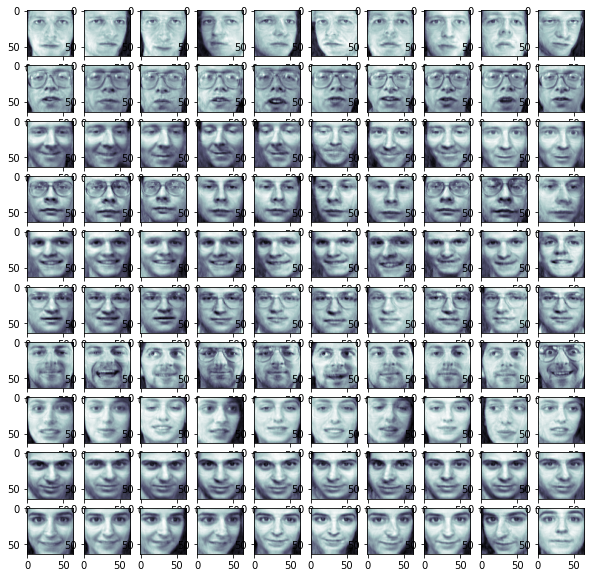

In [26]:
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.imshow(x_approx_images[i], cmap = plt.cm.bone)
plt.show()